# F06 G05 2D project 2021

Install libraries:
- pandas
- numpy
- scipy
- seaborn
- matplotlib
- tk        (Testing purpose)
- scipy     (Testing purpose)

In [12]:
pip install -r requirements.txt

  Using cached pandas-1.3.4-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached tk-0.1.0-py3-none-any.whl (3.9 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SorinoSK-ServerPC\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Import required libraries:
- Display graphs
- numpy, matplotlib and seaborn for graphing

In [13]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

From cohort and homework, we will be using similar functions such as:
- Maximum and minimum normalisation.
- Convertion of x and y axis to numpy array
- Data splitting
- r^2 score
- Mean square error
- Prediction

In [63]:
def normalize_z(df):
    dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    return dfout


def prepare_x(df_x):
    xAxis = df_x.to_numpy()
    array1 = np.ones((df_x.shape[0], 1))
    return np.concatenate((array1, xAxis), axis=1)


def prepare_y(df_y):
    return df_y.to_numpy()


def predict(df_x, beta):
    x = prepare_x(normalize_z(df_x))
    # x = prepare_x(df_x)
    return predict_norm(x, beta)


def predict_norm(X, beta):
    return np.matmul(X, beta)


def split_data(df_x, df_y, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    feature_index = df_x.index

    test_index = np.random.choice(feature_index, size=int(test_size * len(df_x)), replace=False)
    train_index = [x for x in range(len(feature_index)) if x not in test_index]

    df_x_train = df_x.loc[train_index, :]
    df_x_test = df_x.loc[test_index, :]
    df_y_train = df_y.loc[train_index, :]
    df_y_test = df_y.loc[test_index, :]
    return df_x_train, df_x_test, df_y_train, df_y_test


def r2_score(y, ypred):
    ybar = np.mean(y)
    SStot = np.sum((y - ybar) ** 2)
    SSres = np.sum((y - ypred) ** 2)
    return 1 - SSres / SStot


def mean_squared_error(target, pred):
    n = target.shape[0]
    s = np.sum((target - pred) ** 2)
    return (1 / n) * s


def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        yp = np.matmul(X, beta)
        error = yp - y
        delta = np.matmul(X.T, error)
        beta = beta - (alpha/m)*delta
        J_storage[n] = compute_cost(X,y,beta)
    return beta, J_storage


def compute_cost(X, y, beta):
    size = X.shape[0]
    yp = np.matmul(X, beta)
    error = yp - y
    J = (1/(2*size))*np.matmul(error.T, error)
    return J

def NormalisePredict(df, ndf):
    Normalmin = df.min(axis=0)
    Normalmax = df.max(axis=0)
    return (ndf - Normalmin) / (Normalmax - Normalmin)
    


Index(['location', 'date', 'total_deaths', 'Days', 'total_vaccinations',
       'gdp_per_capita', 'population_density', 'human_development_index',
       'hospital_beds_per_thousand', 'median_age', 'aged_70_older', 'n_days',
       'n_total_vaccinations', 'n_gdp_per_capita', 'n_population_density',
       'n_human_development_index', 'n_hospital_beds_prer_thousand',
       'total_population', 'new_deaths_smoothed'],
      dtype='object')
Days             0.000
Vaccinated       0.000
GDP           1900.710
Population       3.202
HDI              0.645
Facilities       0.530
dtype: float64
Days          3.600000e+02
Vaccinated    2.251339e+09
GDP           6.354358e+04
Population    7.915731e+03
HDI           9.600000e-01
Facilities    1.305000e+01
dtype: float64


,Days,Vaccinated,GDP,Population,HDI,Facilities
0,1,0,59797.75,7915.731,0.938,2.4
1,2,0,59797.75,7915.731,0.938,2.4
2,3,0,59797.75,7915.731,0.938,2.4
3,4,0,59797.75,7915.731,0.938,2.4
4,5,0,59797.75,7915.731,0.938,2.4
...,...,...,...,...,...,...
7195,355,21717020,33402.00,673.000,0.960,5.7
7196,356,21717020,33402.00,673.000,0.960,5.7
7197,357,22283271,33402.00,673.000,0.960,5.7
7198,358,22783694,33402.00,673.000,0.960,5.7


Days             0.000
Vaccinated       0.000
GDP           1900.710
Population       3.202
HDI              0.645
Facilities       0.530
dtype: float64
Days          3.590000e+02
Vaccinated    2.244727e+09
GDP           6.354358e+04
Population    7.915731e+03
HDI           9.600000e-01
Facilities    1.305000e+01
dtype: float64


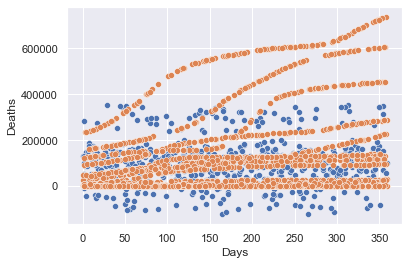

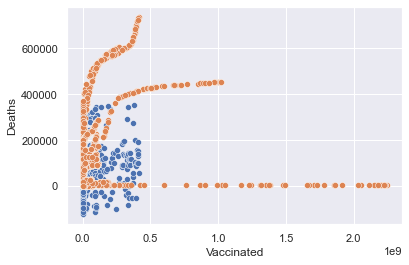

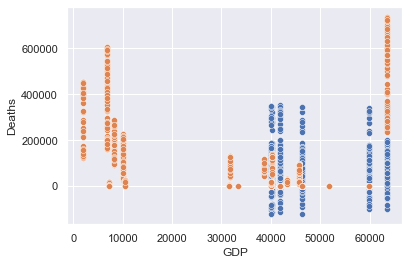

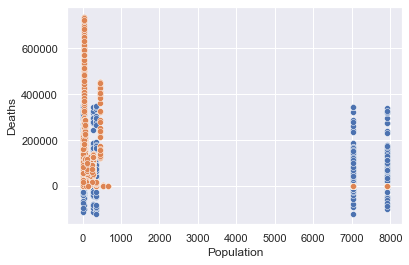

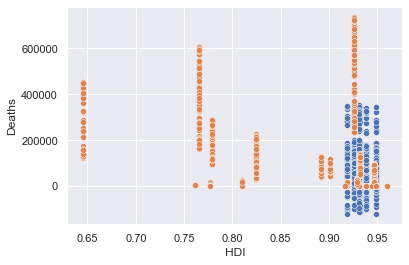

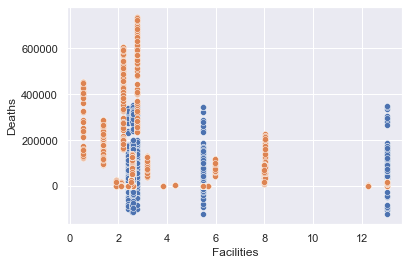

r^2 Value: 0    0.417818
dtype: float64


array([[ 279437.16302384],
       [ 113498.63242159],
       [ -64151.88690206],
       [ 501330.46382046],
       [-177636.40175015],
       [-606607.89587989],
       [ -53314.3196096 ]])

Index(['Days', 'Vaccinated', 'GDP', 'Population', 'HDI', 'Facilities'], dtype='object')

In [64]:
dataFrame = pd.read_csv("2Ddata6.csv")
columns = dataFrame.columns
print(columns)
# sg = pd.DataFrame.reset_index(dataFrame.loc[(dataFrame['location'] == "Singapore"), :])
# dataFrame = pd.DataFrame.reset_index(dataFrame.loc[(pd.to_datetime(dataFrame["date"] >= pd.to_datetime("10/19/2020"))), :])
yVal = pd.DataFrame(dataFrame.loc[:, "total_deaths"].fillna(0))
xVal = pd.DataFrame(columns=[])
#xVal["Days"] = sg["date"].apply(lambda data: (pd.to_datetime(data) - pd.to_datetime(sg.loc[0, "date"])).days)
xVal["Days"] = pd.DataFrame(dataFrame["Days"].fillna(0))
xVal["Vaccinated"] = pd.DataFrame(dataFrame["total_vaccinations"].fillna(0))
xVal["GDP"] = pd.DataFrame(dataFrame["gdp_per_capita"].fillna(0))
xVal["Population"] = pd.DataFrame(dataFrame["population_density"].fillna(0))
xVal["HDI"] = pd.DataFrame(dataFrame["human_development_index"].fillna(0))
xVal["Facilities"] = pd.DataFrame(dataFrame["hospital_beds_per_thousand"].fillna(0))

xVal_train, xVal_test, yVal_train, yVal_test = split_data(xVal, yVal, 70, 0.3)
xMVal = normalize_z(xVal_train)

display(xVal)

xAxis = prepare_x(xMVal)
yAxis = prepare_y(yVal_train)

iterations = 10500
alpha = 0.05
beta = np.zeros((xAxis.shape[1], 1))

beta, dummy = gradient_descent(xAxis, yAxis, beta, alpha, iterations)

prediction = pd.DataFrame(predict(xVal_test, beta))

for x in xVal.columns:
    sns.set()

    scat0 = sns.scatterplot(x=xVal_test[x], y=prediction[0])
    scat1 = sns.scatterplot(x=xVal_test[x], y=yVal_test["total_deaths"])

    scat0.set_ylabel("Deaths")
    scat0.set_xlabel(x)
    plt.show()

print("r^2 Value:", r2_score(prepare_y(yVal_test), prediction))
display(beta)
display(xVal_test.columns)

    

In [58]:
# y = beta[0][0]
# pData = { \
#     "Days": 10, \
#     "Vaccinated": 1000000, \
#     "GDP": 50000, \
#     "Population_Density": 7000, \
#     "Human_Development_Index": 0.928, \
#     "Facilities": 2.2, \
#     }
# pData = pd.DataFrame([pData])
# pData = NormalisePredict(pData)
# for index, x in enumerate(pData):
#     y += pData[x]*beta[index+1][0]

# print("Predicted deaths:", y)

Predicted deaths: -40328084323.434906
